In [17]:
from fri import genClassificationData
#X,y = genClassificationData(n_samples=200, n_features=20,n_strel=4, n_redundant=8,
#                    n_repeated=0, flip_y=0,random_state=2,partition=[4,4])

X,y =  genClassificationData(n_samples=200, n_features=5,n_strel=1, n_redundant=0,
                    n_repeated=0, flip_y=0,random_state=2)

Generating dataset with d=5,n=200,strongly=1,weakly=0, partition of weakly=None


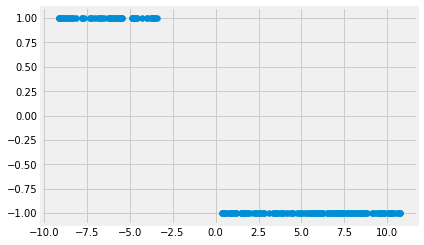

In [28]:
plt.scatter(X[:,0],y)

In [29]:
rel = X[:,0].copy()

In [30]:
s1 = rel[rel>0]

In [33]:
s1 = np.where(rel>0,rel,0)

In [36]:
s2 = np.where(rel<0,rel,0)

In [38]:
X[:,1]=s1
X[:,2]=s2

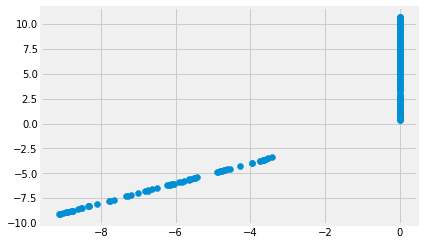

In [50]:
plt.scatter(s2,X[:,0])

In [39]:
X.shape

(200, 5)

We created a binary classification set with 6 features of which 2 are strongly relevant and 2 weakly relevant.

Scale Data

In [41]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

New object for Classification Data

In [42]:
from fri import FRIClassification
fri = FRIClassification(parallel=True)

Fit to data

In [43]:
fri.fit(X_scaled,y)

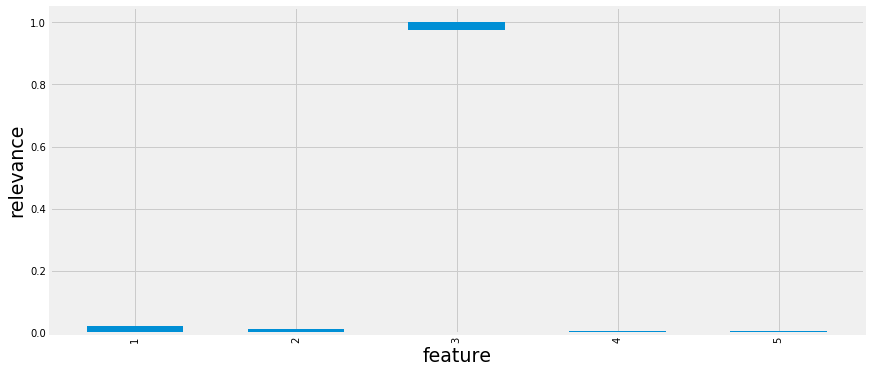

In [44]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('fivethirtyeight')
from fri import plot_dendrogram_and_intervals
from fri import plot

%matplotlib inline
p = plot.plotIntervals(fri.interval_)

# New community detection using  constrained problems

In [7]:
clust, link, dist_mat = fri.community_detection2(X_scaled,y)

In [8]:
clust

array([3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

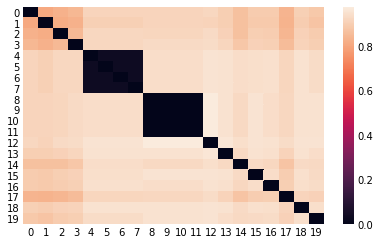

In [9]:
sns.heatmap(dist_mat)

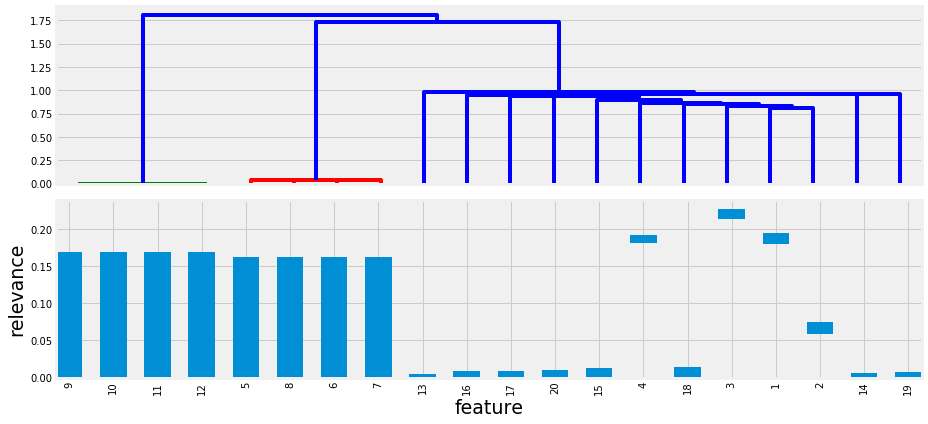

In [10]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Old community detection using differnce between optimal solution and unconstrained problem

In [11]:
clust, link, dist_mat = fri.community_detection()

In [12]:
clust

array([3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

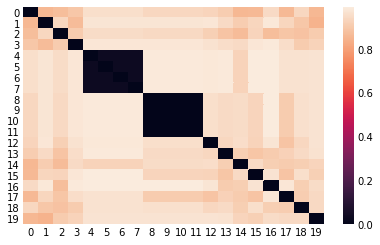

In [13]:
sns.heatmap(dist_mat)

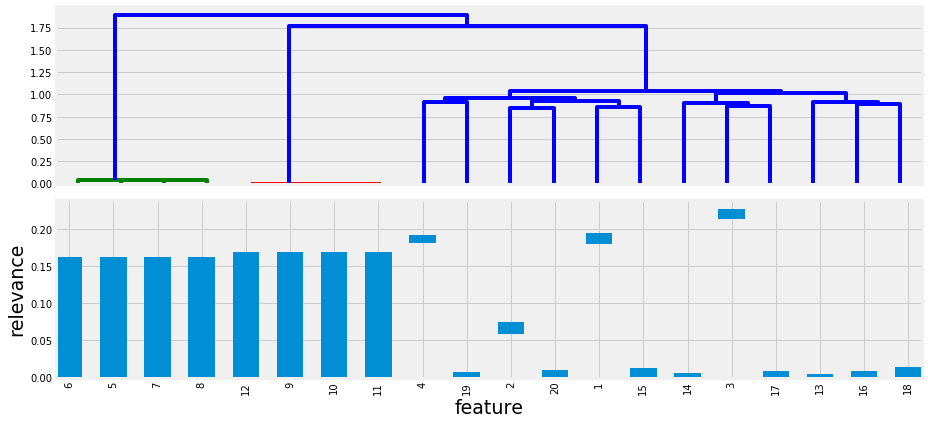

In [14]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Simple Correlation 

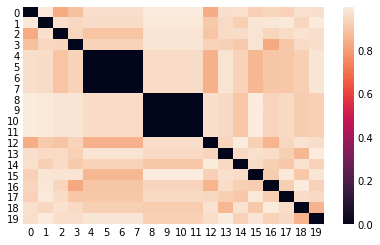

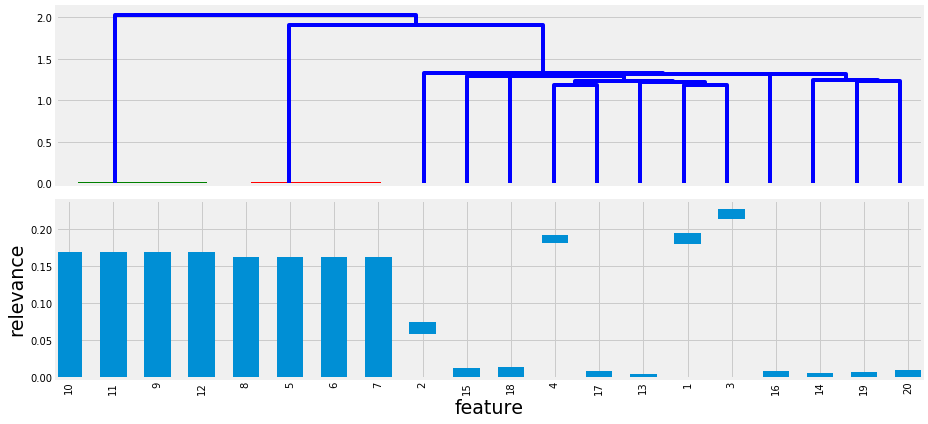

In [15]:
import pandas as pd
corr_pd = pd.DataFrame(X_scaled).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot.plot_dendrogram_and_intervals(fri.interval_,z)